In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("Universities.csv")

In [3]:
df.head()

,University Name,Category,Campuses,Contact Information,Website,Google Map URL,Latitude,Longitude,Image URL,Established Since,Sector,Chartered By,City,Province,Recognized University,Distance Education
0,Abasyn University,General,Islamabad; Peshawar,"Peshawar Campus, Ring Road (Charsadda Link), P...",http://www.abasyn.edu.pk,https://www.google.com/maps/embed?pb=!1m18!1m1...,NaN,NaN,/Style%20Library/HEC/images/Placeholder-Image-...,1/12/2007,Private,Government of Khyber Pakhtunkhwa,Peshawar,Khyber Pakhtunkhwa,Yes,No
1,Abbottabad University of Science and Technolog...,General,Mian Campus,"Captain Akaash Rabbani Shaheed Road, Tehsil Ha...",http://aust.edu.pk,https://www.google.com/maps/embed?pb=!1m18!1m1...,NaN,NaN,/english/universities/PublishingImages/AUST.jpeg,6/1/2015,Public,Government of Khyber Pakhtunkhwa,Abbottabad,Khyber Pakhtunkhwa,Yes,No
2,Abdul Wali Khan University,General,Mardan,"Garden Campus Toru Road, Mardan. +92-937-84335...",http://www.awkum.edu.pk,https://www.google.com/maps/place/Abdul+Wali+K...,NaN,NaN,/Style%20Library/HEC/images/Placeholder-Image-...,2/25/2009,Public,Government of Khyber Pakhtunkhwa,Mardan,Khyber Pakhtunkhwa,Yes,No
3,Aga Khan University,General,Karachi,"Stadium Road, Karachi 74800 +92-21-34863902, +...",http://www.aku.edu/,https://www.google.com/maps/embed?pb=!1m18!1m1...,NaN,NaN,/Style%20Library/HEC/images/Placeholder-Image-...,3/2/1983,Private,Government of Pakistan,Karachi,Sindh,Yes,No
4,"Air University, Islamabad",General,Mian Campus; Kamra; Kharian; Lahore; Multan,"Main Campus, Sector E-9, Islamabad. +92-51-92...",http://www.au.edu.pk/,https://www.google.com/maps/embed?pb=!1m18!1m1...,NaN,NaN,/english/universities/PublishingImages/Islamab...,10/29/2002,Public,Government of Pakistan,Islamabad,Islamabad Capital Territory,Yes,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   University Name        266 non-null    object
 1   Category               266 non-null    object
 2   Campuses               266 non-null    object
 3   Contact Information    266 non-null    object
 4   Website                266 non-null    object
 5   Google Map URL         266 non-null    object
 6   Latitude               1 non-null      object
 7   Longitude              1 non-null      object
 8   Image URL              266 non-null    object
 9   Established Since      266 non-null    object
 10  Sector                 266 non-null    object
 11  Chartered By           266 non-null    object
 12  City                   266 non-null    object
 13  Province               266 non-null    object
 14  Recognized University  266 non-null    object
 15  Distance Education     

In [9]:
df.columns

Index(['University Name', 'Category', 'Campuses', 'Contact Information',
       'Website', 'Google Map URL', 'Latitude', 'Longitude', 'Image URL',
       'Established Since', 'Sector', 'Chartered By', 'City', 'Province',
       'Recognized University', 'Distance Education'],
      dtype='object')

In [17]:
columns_to_drop = ['Contact Information','Website', 'Google Map URL', 'Latitude', 'Longitude', 'Image URL']
df=df.drop(columns=columns_to_drop)
df.columns

Index(['University Name', 'Category', 'Campuses', 'Established Since',
       'Sector', 'Chartered By', 'City', 'Province', 'Recognized University',
       'Distance Education'],
      dtype='object')

In [18]:
df.isna().sum()

University Name          0
Category                 0
Campuses                 0
Established Since        0
Sector                   0
Chartered By             0
City                     0
Province                 0
Recognized University    0
Distance Education       0
dtype: int64

In [19]:
df.isnull().sum()

University Name          0
Category                 0
Campuses                 0
Established Since        0
Sector                   0
Chartered By             0
City                     0
Province                 0
Recognized University    0
Distance Education       0
dtype: int64

In [23]:
df.duplicated().sum()

0

## Total Universities

In [26]:
df['University Name'].value_counts().sum()

266

## Most Campuses

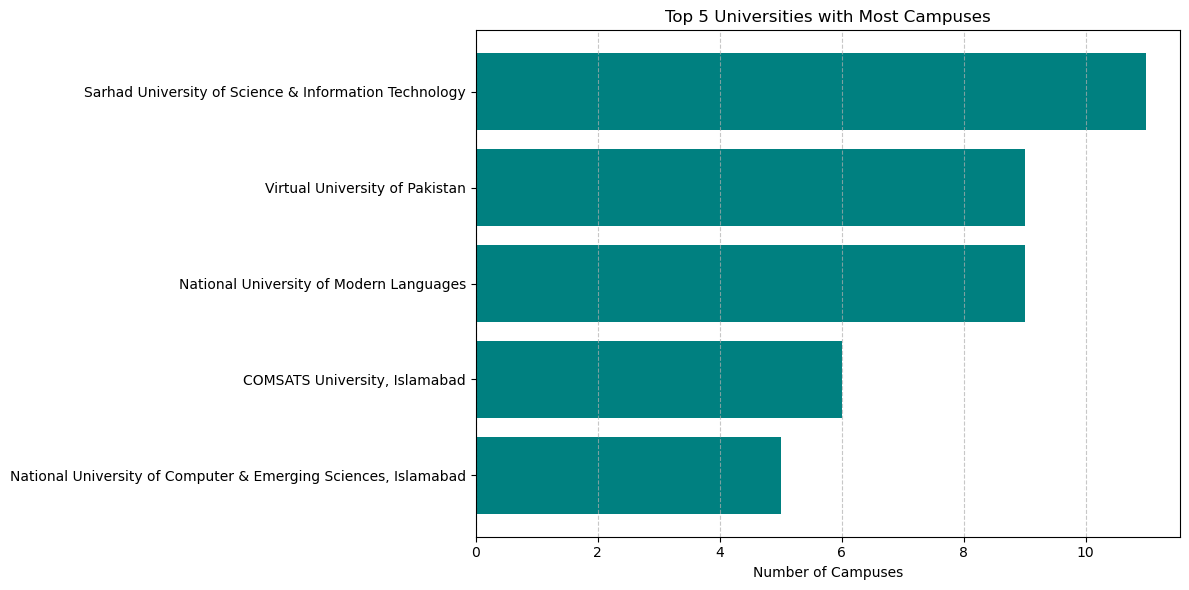

In [32]:
df['Campus_count'] = df['Campuses'].apply(lambda x: len(str(x).split(';')) if pd.notna(x) else 0)
top_campuses = df[['University Name', 'Campus_count']].sort_values(by='Campus_count', ascending=False).head(5)
plt.figure(figsize=(12,6))
plt.barh(top_campuses['University Name'], top_campuses['Campus_count'], color='teal')
plt.xlabel("Number of Campuses")
plt.title("Top 5 Universities with Most Campuses")
plt.gca().invert_yaxis() 
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Most Categories

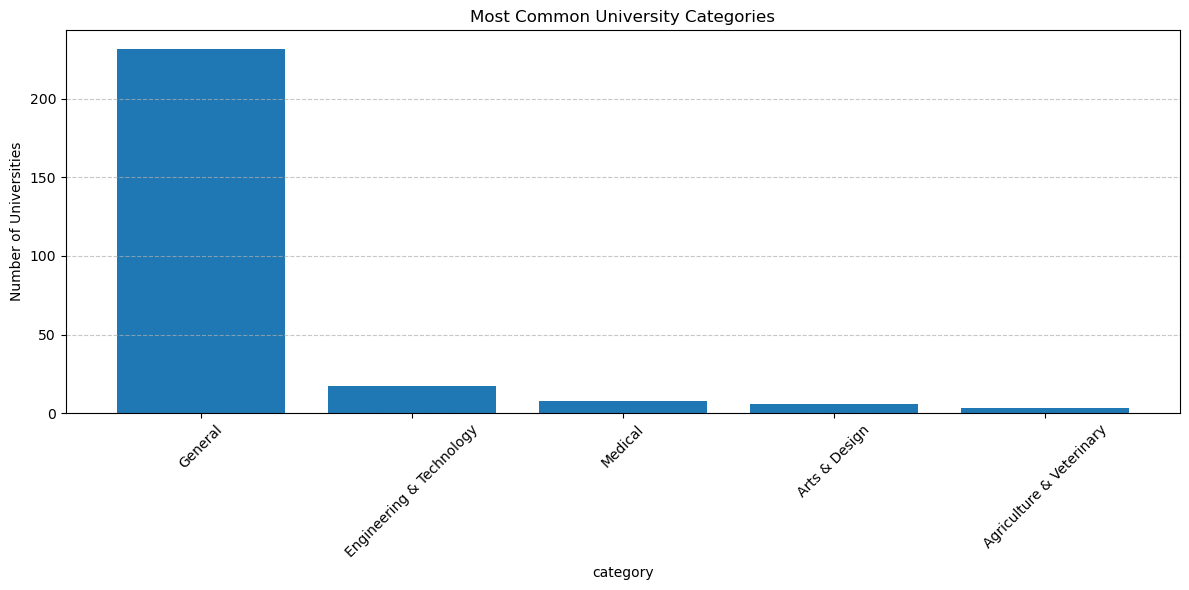

In [43]:
category_count = df['Category'].value_counts()

plt.figure(figsize=(12,6))
bars = plt.bar(category_count.index, category_count.values)
plt.title('Most Common University Categories')
plt.xlabel('category')
plt.ylabel('Number of Universities')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Most Universities in City

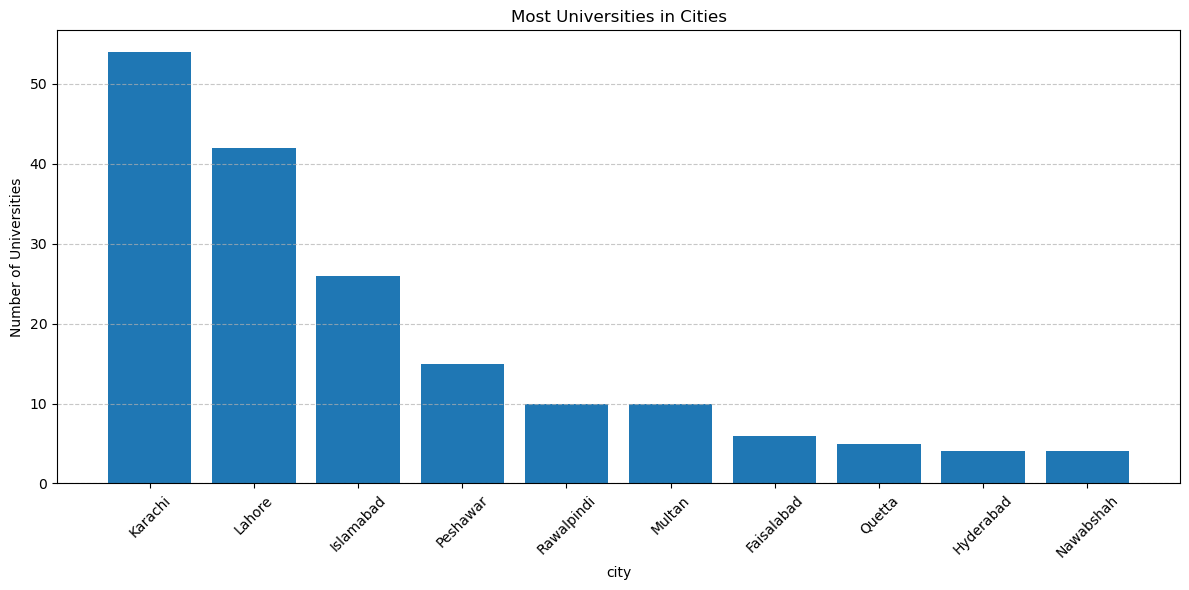

In [50]:
city_count = df['City'].value_counts().head(10)

plt.figure(figsize=(12,6))
bars = plt.bar(city_count.index, city_count.values)
plt.title('Most Universities in Cities')
plt.xlabel('city')
plt.ylabel('Number of Universities')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [67]:
df['Established Since'].isna().sum()

265

## Chartered By

<module 'matplotlib.pyplot' from 'C:\\Users\\Administrator\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

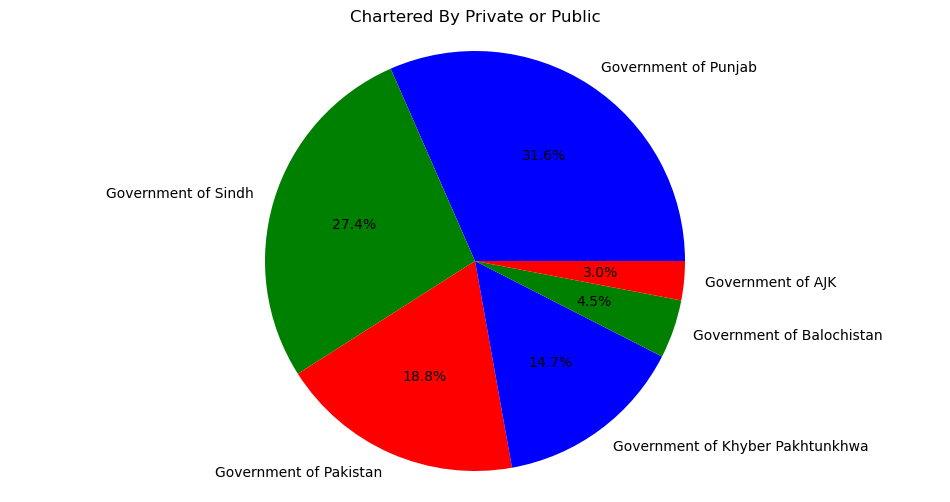

In [78]:
charter_count = df['Chartered By'].value_counts()
plt.figure(figsize=(12,6))
plt.pie(charter_count, labels=charter_count.index, autopct='%1.1f%%', colors=['blue','green','red'])
plt.title('Chartered By Private or Public')
plt.axis('equal')
plt

## Most Universities in Province 

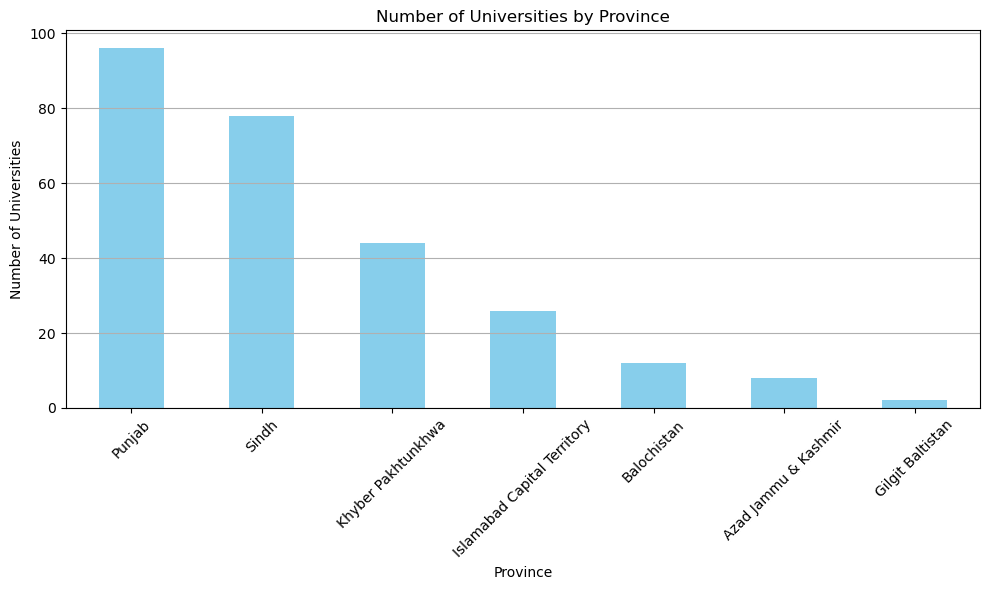

In [82]:
province_counts = df['Province'].value_counts()

province_counts.plot(kind='bar', color='skyblue', figsize=(10,6))
plt.title('Number of Universities by Province')
plt.xlabel('Province')
plt.ylabel('Number of Universities')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Recognized

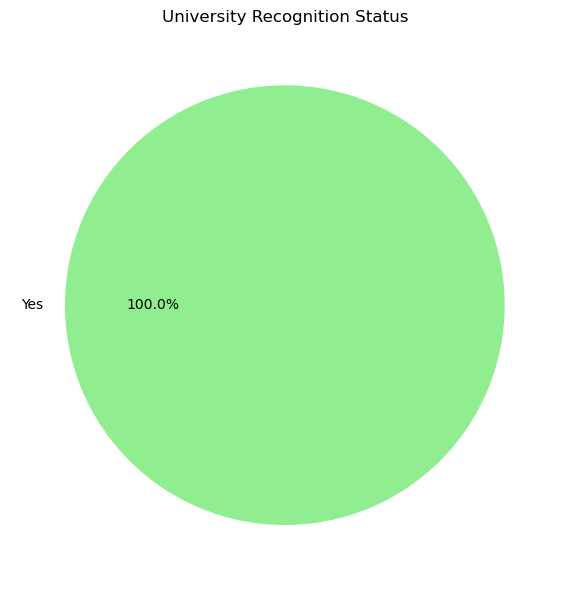

In [85]:
recognized_counts = df['Recognized University'].value_counts()

recognized_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'salmon'], figsize=(6,6))
plt.title('University Recognition Status')
plt.ylabel('')
plt.tight_layout()
plt.show()


## Distance Education Offered 

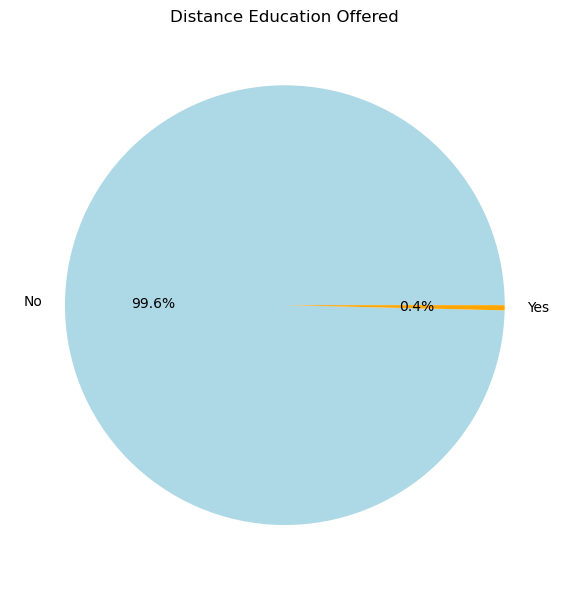

In [86]:
distance_counts = df['Distance Education'].value_counts()

distance_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'orange'], figsize=(6,6))
plt.title('Distance Education Offered')
plt.ylabel('')
plt.tight_layout()
plt.show()


In [88]:
df.to_csv('cleaned_universities.csv', index=False)